In [1]:
inflation_rates = [
    4.1, 2.8, 3.5, 3.6, 2.8, 2.2, 2.5, 4.7, 2.8, 2.9, 
    4.0, 2.2, 1.3, 1.3, 0.7, 1.0, 1.9, 1.5, 0.4, 0.5, 
    2.5, 5.1, 3.6, 2.3  # 2001~2024 기준, 마지막은 2024년
]

In [2]:
import pandas as pd
import numpy as np

# 연도 생성 (2001~2024)
years = list(range(2001, 2025))

# 소비자물가 상승률 (% → 비율 변환)
inflation_factors = [1 + r / 100 for r in inflation_rates]

# 누적 상승률 계산 (2001~해당 연도까지 누적)
cumulative_factors = np.cumprod(inflation_factors)

# 2024년 값을 기준으로 모든 연도 조정 계수 계산
base_2024 = cumulative_factors[-1]
adjustment_factors = base_2024 / cumulative_factors

# DataFrame으로 정리
adjustment_df = pd.DataFrame({
    'Year': years,
    'Inflation_Rate': inflation_rates,
    'Adjustment_Factor': adjustment_factors
})

print(adjustment_df)


    Year  Inflation_Rate  Adjustment_Factor
0   2001             4.1           1.737690
1   2002             2.8           1.690360
2   2003             3.5           1.633198
3   2004             3.6           1.576446
4   2005             2.8           1.533507
5   2006             2.2           1.500496
6   2007             2.5           1.463899
7   2008             4.7           1.398184
8   2009             2.8           1.360101
9   2010             2.9           1.321770
10  2011             4.0           1.270933
11  2012             2.2           1.243574
12  2013             1.3           1.227615
13  2014             1.3           1.211861
14  2015             0.7           1.203437
15  2016             1.0           1.191522
16  2017             1.9           1.169305
17  2018             1.5           1.152025
18  2019             0.4           1.147435
19  2020             0.5           1.141726
20  2021             2.5           1.113879
21  2022             5.1        

In [3]:
df = pd.read_csv("C:/Users/tnfus/Desktop/프로야구타자/0123타자.csv", encoding = 'euc-kr')

In [4]:
# 1. adjustment_df를 기존 df와 연도 기준으로 merge
df = df.merge(adjustment_df[['Year', 'Adjustment_Factor']], on='Year', how='left')

# 2. 연도 보정 연봉 컬럼 생성
df['Salary_Adj2024'] = df['Salary'] * df['Adjustment_Factor']

# (선택) 이전 연봉도 조정하려면
if 'Prev_Salary' in df.columns:
    df['Prev_Salary_Adj2024'] = df['Prev_Salary'] * df['Adjustment_Factor']

In [5]:
df

,Name,Year,Team,Salary,Prev_Salary,is_rookie,FA,Birth,Age,Position,...,SF,AVG,OBP,SLG,OPS,R/ePA,wRC+,Adjustment_Factor,Salary_Adj2024,Prev_Salary_Adj2024
0,강경학,2021,KIA,7000,8700.0,X,X,1992,29,SS,...,0,0.152,0.282,0.152,0.434,0.032,25.6,1.113879,7797.154596,9690.749284
1,강경학,2020,HANWHA,8700,7800.0,X,X,1992,28,SS,...,2,0.228,0.352,0.337,0.689,0.117,91.8,1.141726,9933.018016,8905.464428
2,강경학,2019,HANWHA,7800,8800.0,X,X,1992,27,SS,...,1,0.239,0.341,0.274,0.615,0.092,80.8,1.147435,8949.991750,10097.426590
3,강경학,2018,HANWHA,8800,5800.0,X,X,1992,26,SS,...,1,0.278,0.382,0.392,0.774,0.147,104.6,1.152025,10137.816296,6681.742559
4,강경학,2017,HANWHA,5800,6200.0,X,X,1992,25,SS,...,0,0.214,0.290,0.262,0.552,0.051,38.5,1.169305,6781.968697,7249.690676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4879,황진수,2017,LOTTE,6200,2800.0,X,X,1989,28,3B,...,1,0.291,0.359,0.402,0.761,0.128,89.9,1.169305,7249.690676,3274.053854
4880,황진수,2016,LOTTE,2800,2800.0,X,X,1989,27,3B,...,0,0.000,0.000,0.000,0.000,-0.195,-139.4,1.191522,3336.260877,3336.260877
4881,황진수,2015,LOTTE,2800,2900.0,X,X,1989,26,3B,...,0,0.000,0.000,0.000,0.000,-0.186,-149.0,1.203437,3369.623486,3489.967182
4882,황진수,2014,LOTTE,2900,2500.0,X,X,1989,25,3B,...,0,0.000,0.000,0.000,0.000,-0.196,-138.7,1.211861,3514.396952,3029.652545


In [6]:
df.columns

Index(['Name', 'Year', 'Team', 'Salary', 'Prev_Salary', 'is_rookie', 'FA',
       'Birth', 'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
       'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
       'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA',
       'wRC+', 'Adjustment_Factor', 'Salary_Adj2024', 'Prev_Salary_Adj2024'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
# 범주형 처리
categorical_cols = ['Team', 'is_rookie', 'FA', 'Position']
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
features = ['Year', 'Team', 'Prev_Salary_Adj2024', 'is_rookie', 'FA',
           'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
           'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
           'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA',
           'wRC+']
target = 'Salary_Adj2024'
# 학습용 데이터 구성
X = df[features]
y = df[target]

# train/val 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 (예시)
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=4)
model_xgb.fit(X_train, y_train)

model_lgb = lgb.LGBMRegressor(n_estimators=200, max_depth=4)
model_lgb.fit(X_train, y_train)

model_cat = CatBoostRegressor(iterations=200, depth=4, verbose=0)
model_cat.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000398 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4610
[LightGBM] [Info] Number of data points in the train set: 3907, number of used features: 36
[LightGBM] [Info] Start training from score 18465.341169
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

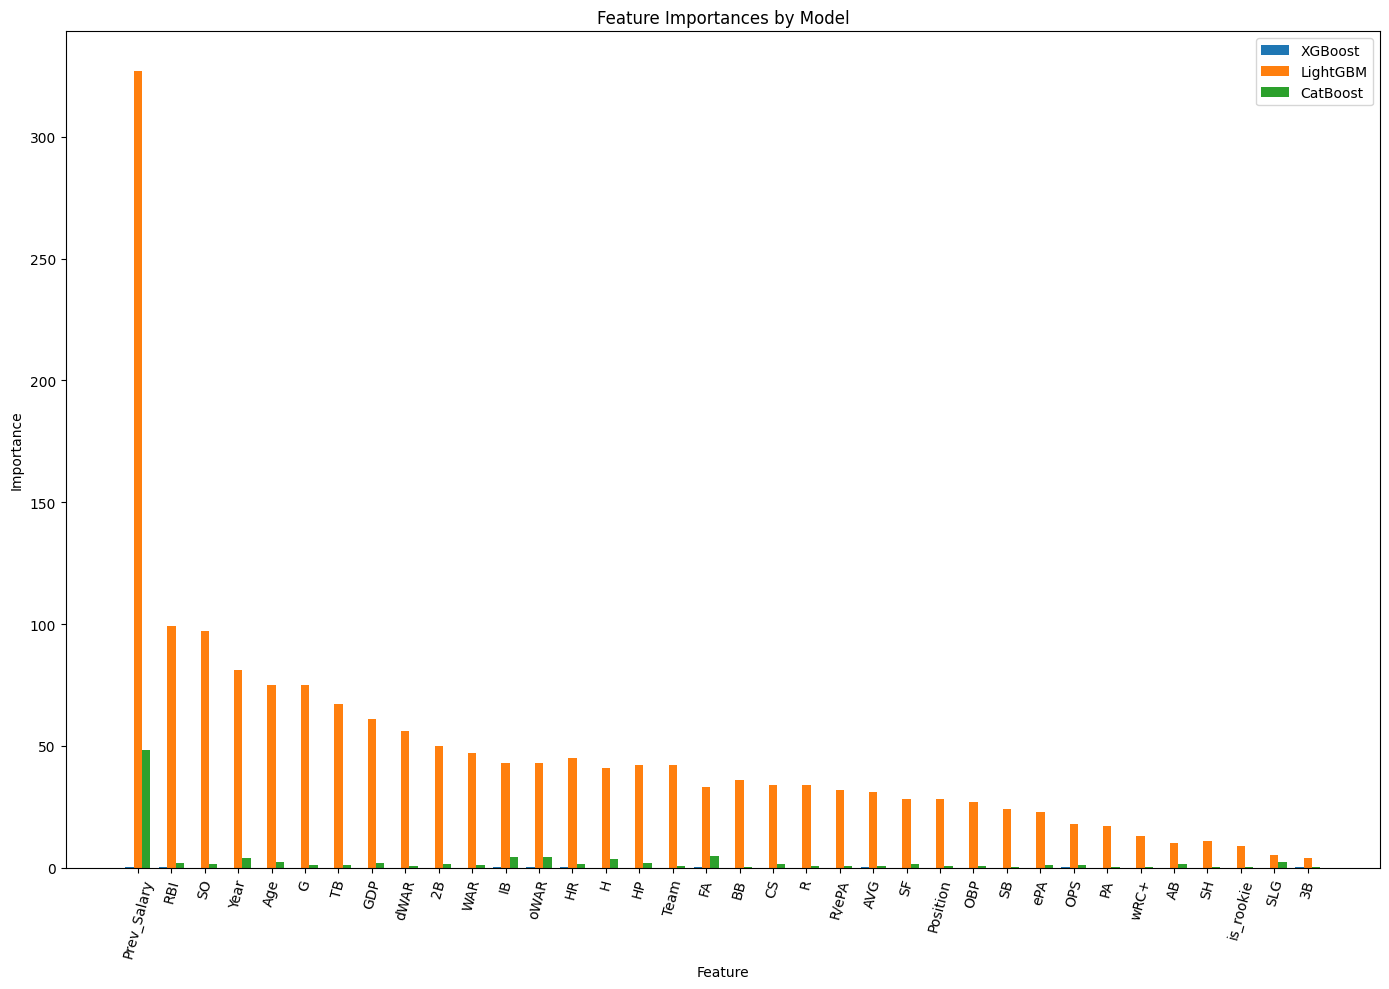

In [8]:

# 🎯 예시용 피처들 (원하는 대로 수정 가능)
features = ['Year', 'Team', 'Prev_Salary', 'is_rookie', 'FA',
           'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
           'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
           'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA',
           'wRC+']
target = 'Salary'

# 1. 결측치 일단 그대로 두기 (트리 모델들은 NaN 처리 가능)
X = df[features].copy()
y = df[target]
# ✅ X에서 피처 이름 추출
feature_names = X.columns.tolist()

# 1. XGBoost 중요도
xgb_importance = model_xgb.feature_importances_

# 2. LightGBM 중요도
lgb_importance = model_lgb.feature_importances_

# 3. CatBoost 중요도
cat_importance = model_cat.get_feature_importance()

# 정리해서 데이터프레임으로
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost': xgb_importance,
    'LightGBM': lgb_importance,
    'CatBoost': cat_importance
})

# 평균 중요도 기준 정렬
importance_df['Mean_Importance'] = importance_df[['XGBoost', 'LightGBM', 'CatBoost']].mean(axis=1)
importance_df = importance_df.sort_values(by='Mean_Importance', ascending=False)

# 전체 피처 시각화 (Top 20 → 전체로 변경)
plt.figure(figsize=(14, 10))
bar_width = 0.25
index = np.arange(len(importance_df))

plt.bar(index, importance_df['XGBoost'], bar_width, label='XGBoost')
plt.bar(index + bar_width, importance_df['LightGBM'], bar_width, label='LightGBM')
plt.bar(index + 2 * bar_width, importance_df['CatBoost'], bar_width, label='CatBoost')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances by Model')
plt.xticks(index + bar_width, importance_df['Feature'], rotation=75)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# 정규화 대상 컬럼
models = ['XGBoost', 'LightGBM', 'CatBoost']

# 정규화 복사본 생성
normalized_df = importance_df.copy()

# 각 모델별로 max 기준 정규화 (0~1)
for model in models:
    max_val = normalized_df[model].max()
    if max_val != 0:
        normalized_df[model] = normalized_df[model] / max_val
    else:
        normalized_df[model] = 0

# 평균 중요도 다시 계산
normalized_df['Mean_Importance'] = normalized_df[models].mean(axis=1)

# 중요도 기준 전체 정렬
normalized_df = normalized_df.sort_values(by='Mean_Importance', ascending=False)

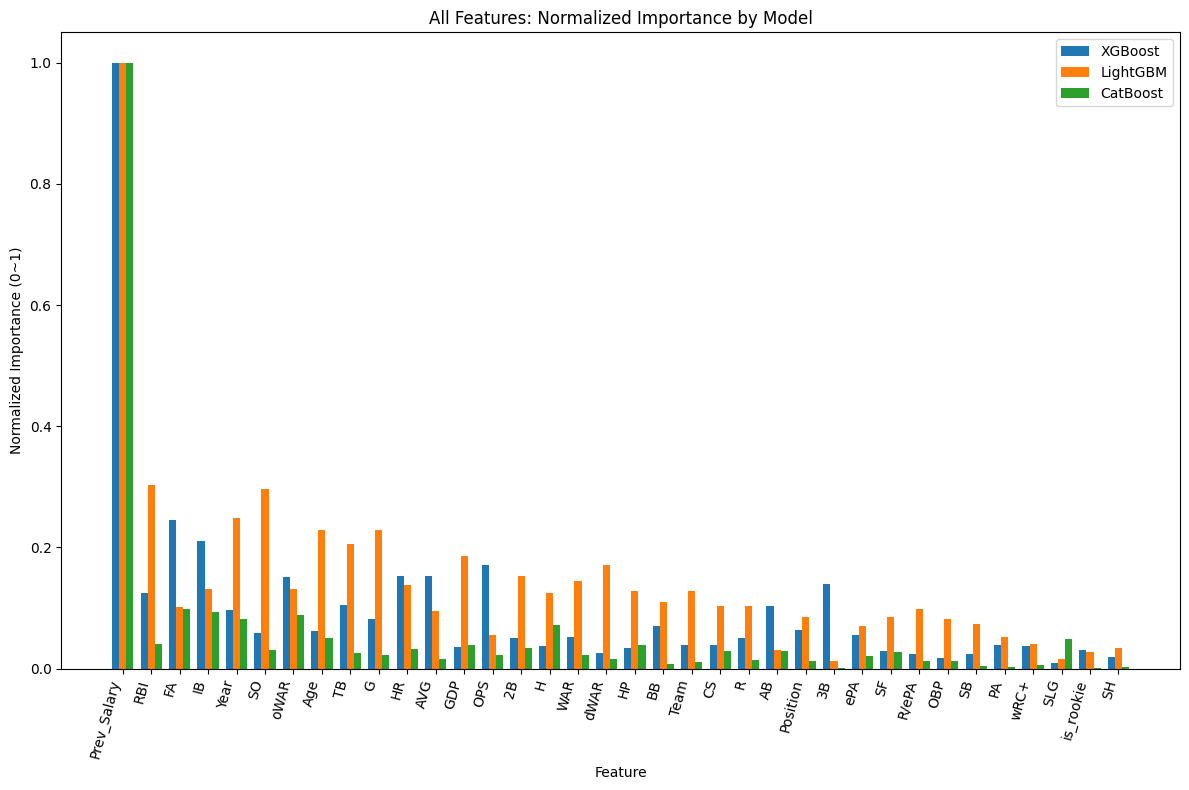

In [10]:
import matplotlib.pyplot as plt
import numpy as np

n_features = len(normalized_df)
index = np.arange(n_features)
bar_width = 0.25

plt.figure(figsize=(max(12, n_features * 0.3), 8))  # 피처 수에 따라 그래프 폭 조절

plt.bar(index, normalized_df['XGBoost'], bar_width, label='XGBoost')
plt.bar(index + bar_width, normalized_df['LightGBM'], bar_width, label='LightGBM')
plt.bar(index + 2 * bar_width, normalized_df['CatBoost'], bar_width, label='CatBoost')

plt.xlabel('Feature')
plt.ylabel('Normalized Importance (0~1)')
plt.title('All Features: Normalized Importance by Model')
plt.xticks(index + bar_width, normalized_df['Feature'], rotation=75, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"📊 {model_name}")
    print(f"   🔹 RMSE : {rmse:,.0f}원")
    print(f"   🔹 MAE  : {mae:,.0f}원")
    print(f"   🔹 R²    : {r2:.4f}")
    print("")

# 예측값 준비
pred_xgb = model_xgb.predict(X_val)
pred_lgb = model_lgb.predict(X_val)
pred_cat = model_cat.predict(X_val)

# 평가
evaluate_model(y_val, pred_xgb, "XGBoost")
evaluate_model(y_val, pred_lgb, "LightGBM")
evaluate_model(y_val, pred_cat, "CatBoost")

📊 XGBoost
   🔹 RMSE : 11,090원
   🔹 MAE  : 4,374원
   🔹 R²    : 0.8149

📊 LightGBM
   🔹 RMSE : 10,968원
   🔹 MAE  : 4,132원
   🔹 R²    : 0.8189

📊 CatBoost
   🔹 RMSE : 10,983원
   🔹 MAE  : 4,344원
   🔹 R²    : 0.8185



In [12]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

# 데이터 분할 (혹시 모를 경우를 대비해 다시 확인)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 Optuna 목적 함수
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'tree_method': 'hist',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)

    # ✅ 여기가 수정된 부분
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    return rmse

# ✅ Optuna 실행 (이게 빠져있었음!)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # 시도 횟수 조절 가능

[I 2025-04-16 16:20:43,019] A new study created in memory with name: no-name-47f50891-4d77-4a3a-91f1-cfa221b7193d
[I 2025-04-16 16:20:43,301] Trial 0 finished with value: 10656.53226898882 and parameters: {'max_depth': 7, 'learning_rate': 0.07923265800734398, 'n_estimators': 217, 'subsample': 0.6161889832335498, 'colsample_bytree': 0.7034928465272865, 'reg_alpha': 0.4008980195158962, 'reg_lambda': 1.1069512058092135}. Best is trial 0 with value: 10656.53226898882.
[I 2025-04-16 16:20:44,839] Trial 1 finished with value: 11236.339973496708 and parameters: {'max_depth': 10, 'learning_rate': 0.1723040229883942, 'n_estimators': 313, 'subsample': 0.7897962843428631, 'colsample_bytree': 0.7479583292400488, 'reg_alpha': 3.885176859105597, 'reg_lambda': 0.5709182712267524}. Best is trial 0 with value: 10656.53226898882.
[I 2025-04-16 16:20:45,196] Trial 2 finished with value: 10271.62187777568 and parameters: {'max_depth': 5, 'learning_rate': 0.03843086243695282, 'n_estimators': 456, 'subsampl

In [13]:
print("💡 Best trial:")
print(study.best_trial)

# 또는
best_params = study.best_params
print("🎯 Best Params:", best_params)

💡 Best trial:
FrozenTrial(number=29, state=1, values=[9991.697753635264], datetime_start=datetime.datetime(2025, 4, 16, 16, 21, 6, 417714), datetime_complete=datetime.datetime(2025, 4, 16, 16, 21, 6, 901754), params={'max_depth': 6, 'learning_rate': 0.08964655655299253, 'n_estimators': 428, 'subsample': 0.627772619077352, 'colsample_bytree': 0.9957617390962314, 'reg_alpha': 1.275583809164139, 'reg_lambda': 1.5894781117523755}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=500, log=False, low=100, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'reg_alpha': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'reg_lambda': FloatDistribution(high=5.0, log=False, low=0

In [15]:
best_params = {
    'max_depth': 6,
    'learning_rate': 0.08964655655299253,
    'n_estimators': 428,
    'subsample': 0.627772619077352,
    'colsample_bytree': 0.9957617390962314,
    'reg_alpha': 1.275583809164139,
    'reg_lambda': 1.5894781117523755,
    'random_state': 42
}

In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

# 모델 학습
model_xgb_best = xgb.XGBRegressor(
    **best_params,
    objective='reg:squarederror',
    tree_method='hist',
    verbosity=0
)

model_xgb_best.fit(X_train, y_train)
pred = model_xgb_best.predict(X_val)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_val, pred))
mae = mean_absolute_error(y_val, pred)
r2 = r2_score(y_val, pred)

print("\n📊 튜닝된 XGBoost 성능:")
print(f"   🔹 RMSE : {rmse:,.0f}원")
print(f"   🔹 MAE  : {mae:,.0f}원")
print(f"   🔹 R²    : {r2:.4f}")


📊 튜닝된 XGBoost 성능:
   🔹 RMSE : 9,445원
   🔹 MAE  : 3,360원
   🔹 R²    : 0.8227


In [17]:
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_squared_error

# 🎯 목적 함수
def objective_lgb(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train, categorical_feature=[X.columns.get_loc(c) for c in categorical_cols])
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    return rmse

# Optuna 튜닝 실행
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=30)

[I 2025-04-16 16:22:19,667] A new study created in memory with name: no-name-fe698f4a-0d00-47da-90ef-010b66cbe0aa
[I 2025-04-16 16:22:19,766] Trial 0 finished with value: 9941.151684570468 and parameters: {'max_depth': 9, 'learning_rate': 0.11688887643795175, 'n_estimators': 180, 'subsample': 0.9884073498462342, 'colsample_bytree': 0.6894575385416932, 'reg_alpha': 0.33426809886459075, 'reg_lambda': 4.6301522592852224}. Best is trial 0 with value: 9941.151684570468.
[I 2025-04-16 16:22:19,867] Trial 1 finished with value: 10415.027418292493 and parameters: {'max_depth': 3, 'learning_rate': 0.14154041280704743, 'n_estimators': 480, 'subsample': 0.9254941384284338, 'colsample_bytree': 0.8480723840751437, 'reg_alpha': 0.8071087145551015, 'reg_lambda': 3.1246954171954795}. Best is trial 0 with value: 9941.151684570468.
[I 2025-04-16 16:22:20,041] Trial 2 finished with value: 10087.94304474035 and parameters: {'max_depth': 10, 'learning_rate': 0.1328923692060349, 'n_estimators': 271, 'subsam

In [19]:
from catboost import CatBoostRegressor

def objective_cat(trial):
    param = {
        'loss_function': 'RMSE',
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'iterations': trial.suggest_int('iterations', 100, 500),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'verbose': 0
    }

    model = CatBoostRegressor(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    return rmse

# Optuna 실행
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=30)

[I 2025-04-16 16:23:13,466] A new study created in memory with name: no-name-1f227115-ceac-475b-a5a7-d70047ca6436
[I 2025-04-16 16:23:13,908] Trial 0 finished with value: 11099.826072410044 and parameters: {'depth': 4, 'learning_rate': 0.2666750796475171, 'iterations': 414, 'l2_leaf_reg': 6.979130817206583, 'random_strength': 1.4796490512288183, 'bagging_temperature': 0.2771405739537217}. Best is trial 0 with value: 11099.826072410044.
[I 2025-04-16 16:23:14,605] Trial 1 finished with value: 9967.191503753153 and parameters: {'depth': 6, 'learning_rate': 0.25069994655779204, 'iterations': 374, 'l2_leaf_reg': 7.116166276717457, 'random_strength': 2.254311366479511, 'bagging_temperature': 0.24734343969673322}. Best is trial 1 with value: 9967.191503753153.
[I 2025-04-16 16:23:15,064] Trial 2 finished with value: 10720.648498201048 and parameters: {'depth': 5, 'learning_rate': 0.07173771620731703, 'iterations': 343, 'l2_leaf_reg': 5.647965765050166, 'random_strength': 4.2637130942753485, 

In [20]:
# 결과 리스트
results = []

# ✅ XGBoost
print("🔍 Tuning XGBoost...")
print("💡 Best Params (XGBoost):")
print(study.best_params)

model_xgb_best = xgb.XGBRegressor(
    **study.best_params,
    objective='reg:squarederror',
    tree_method='hist',
    verbosity=0
)
model_xgb_best.fit(X_train, y_train)
pred_xgb = model_xgb_best.predict(X_val)

results.append({
    'Model': 'XGBoost',
    'RMSE': np.sqrt(mean_squared_error(y_val, pred_xgb)),
    'MAE': mean_absolute_error(y_val, pred_xgb),
    'R2': r2_score(y_val, pred_xgb),
    'Best Params': study.best_params
})

# ✅ LightGBM
print("\n🔍 Tuning LightGBM...")
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=30)

print("💡 Best Params (LightGBM):")
print(study_lgb.best_params)

model_lgb_best = lgb.LGBMRegressor(**study_lgb.best_params)
model_lgb_best.fit(X_train, y_train, categorical_feature=[X.columns.get_loc(c) for c in categorical_cols])
pred_lgb = model_lgb_best.predict(X_val)

results.append({
    'Model': 'LightGBM',
    'RMSE': np.sqrt(mean_squared_error(y_val, pred_lgb)),
    'MAE': mean_absolute_error(y_val, pred_lgb),
    'R2': r2_score(y_val, pred_lgb),
    'Best Params': study_lgb.best_params
})

# ✅ CatBoost
print("\n🔍 Tuning CatBoost...")
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=30)

print("💡 Best Params (CatBoost):")
print(study_cat.best_params)

model_cat_best = CatBoostRegressor(**study_cat.best_params, verbose=0)
model_cat_best.fit(X_train, y_train)
pred_cat = model_cat_best.predict(X_val)

results.append({
    'Model': 'CatBoost',
    'RMSE': np.sqrt(mean_squared_error(y_val, pred_cat)),
    'MAE': mean_absolute_error(y_val, pred_cat),
    'R2': r2_score(y_val, pred_cat),
    'Best Params': study_cat.best_params
})

# ✅ 성능 출력
result_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("\n📈 튜닝된 모델 성능 비교")
print(result_df[['Model', 'RMSE', 'MAE', 'R2']].to_string(index=False))

# ✅ 각 모델 Best Params 출력
for row in results:
    print(f"\n🔧 {row['Model']} Best Params:")
    for k, v in row['Best Params'].items():
        print(f"  {k}: {v}")

🔍 Tuning XGBoost...
💡 Best Params (XGBoost):
{'max_depth': 6, 'learning_rate': 0.08964655655299253, 'n_estimators': 428, 'subsample': 0.627772619077352, 'colsample_bytree': 0.9957617390962314, 'reg_alpha': 1.275583809164139, 'reg_lambda': 1.5894781117523755}


[I 2025-04-16 16:25:31,205] A new study created in memory with name: no-name-79f5ec45-c8c8-4bd0-8ced-589b0b141e8a
[I 2025-04-16 16:25:31,260] Trial 0 finished with value: 10868.889323526919 and parameters: {'max_depth': 3, 'learning_rate': 0.22463038833787305, 'n_estimators': 194, 'subsample': 0.8540219871471388, 'colsample_bytree': 0.6804097959156593, 'reg_alpha': 1.6172456946184428, 'reg_lambda': 3.7076093794031677}. Best is trial 0 with value: 10868.889323526919.
[I 2025-04-16 16:25:31,308] Trial 1 finished with value: 10110.242315105235 and parameters: {'max_depth': 5, 'learning_rate': 0.03754533143016175, 'n_estimators': 126, 'subsample': 0.9638150939553963, 'colsample_bytree': 0.6873050301069101, 'reg_alpha': 4.078727341091714, 'reg_lambda': 4.872142360876084}. Best is trial 1 with value: 10110.242315105235.



🔍 Tuning LightGBM...


[I 2025-04-16 16:25:31,466] Trial 2 finished with value: 10723.010375639598 and parameters: {'max_depth': 9, 'learning_rate': 0.21387359412571347, 'n_estimators': 290, 'subsample': 0.7042400846288435, 'colsample_bytree': 0.8381155047592983, 'reg_alpha': 0.34520029369984995, 'reg_lambda': 1.8768104132915213}. Best is trial 1 with value: 10110.242315105235.
[I 2025-04-16 16:25:31,660] Trial 3 finished with value: 10225.521986462141 and parameters: {'max_depth': 10, 'learning_rate': 0.28530238302507305, 'n_estimators': 322, 'subsample': 0.9324358510307661, 'colsample_bytree': 0.8390732110019138, 'reg_alpha': 0.5144406405995539, 'reg_lambda': 4.274913946559426}. Best is trial 1 with value: 10110.242315105235.
[I 2025-04-16 16:25:31,754] Trial 4 finished with value: 10452.547137976115 and parameters: {'max_depth': 10, 'learning_rate': 0.26075418746479184, 'n_estimators': 158, 'subsample': 0.9032912584912675, 'colsample_bytree': 0.7636150078809383, 'reg_alpha': 2.5896638971562345, 'reg_lambd

💡 Best Params (LightGBM):
{'max_depth': 6, 'learning_rate': 0.056009150466456596, 'n_estimators': 452, 'subsample': 0.6067915843922589, 'colsample_bytree': 0.8714195051894797, 'reg_alpha': 0.9407427423082138, 'reg_lambda': 2.258024977861727}

🔍 Tuning CatBoost...


[I 2025-04-16 16:25:39,056] Trial 0 finished with value: 10143.69560818822 and parameters: {'depth': 9, 'learning_rate': 0.08825952578952831, 'iterations': 261, 'l2_leaf_reg': 9.352981777979261, 'random_strength': 9.413854795778764, 'bagging_temperature': 0.9386593137847429}. Best is trial 0 with value: 10143.69560818822.
[I 2025-04-16 16:25:45,812] Trial 1 finished with value: 10406.548903502304 and parameters: {'depth': 9, 'learning_rate': 0.12479875084707343, 'iterations': 496, 'l2_leaf_reg': 1.437323495223396, 'random_strength': 3.4090420162793365, 'bagging_temperature': 0.14320135596855577}. Best is trial 0 with value: 10143.69560818822.
[I 2025-04-16 16:25:56,420] Trial 2 finished with value: 10177.536042906482 and parameters: {'depth': 10, 'learning_rate': 0.28349858717881793, 'iterations': 289, 'l2_leaf_reg': 3.1865328121367544, 'random_strength': 3.8506125371743174, 'bagging_temperature': 0.05081463257118113}. Best is trial 0 with value: 10143.69560818822.
[I 2025-04-16 16:25:

💡 Best Params (CatBoost):
{'depth': 7, 'learning_rate': 0.07880570662765202, 'iterations': 360, 'l2_leaf_reg': 3.663677397227332, 'random_strength': 7.107332167449826, 'bagging_temperature': 0.814529841494066}

📈 튜닝된 모델 성능 비교
   Model        RMSE         MAE       R2
CatBoost 9587.628672 3536.464679 0.817249
LightGBM 9657.177361 3602.566698 0.814588
 XGBoost 9991.697754 3542.203857 0.801521

🔧 XGBoost Best Params:
  max_depth: 6
  learning_rate: 0.08964655655299253
  n_estimators: 428
  subsample: 0.627772619077352
  colsample_bytree: 0.9957617390962314
  reg_alpha: 1.275583809164139
  reg_lambda: 1.5894781117523755

🔧 LightGBM Best Params:
  max_depth: 6
  learning_rate: 0.056009150466456596
  n_estimators: 452
  subsample: 0.6067915843922589
  colsample_bytree: 0.8714195051894797
  reg_alpha: 0.9407427423082138
  reg_lambda: 2.258024977861727

🔧 CatBoost Best Params:
  depth: 7
  learning_rate: 0.07880570662765202
  iterations: 360
  l2_leaf_reg: 3.663677397227332
  random_strength: 

# 오히려 설명력이 줄어들음. 다른 방법을 써봐야 할 것 같음

In [24]:
print(df.columns)

Index(['Name', 'Year', 'Team', 'Salary', 'Prev_Salary', 'is_rookie', 'FA',
       'Birth', 'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
       'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
       'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA',
       'wRC+'],
      dtype='object')


In [35]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)

# 연도별 소비자물가 상승률 (2001~2024 기준)
inflation_rates = [
    4.1, 2.8, 3.5, 3.6, 2.8, 2.2, 2.5, 4.7, 2.8, 2.9, 4.0, 2.2, 1.3,
    1.3, 0.7, 1.0, 1.9, 1.5, 0.4, 0.5, 2.5, 5.1, 3.6, 2.3
]
years = list(range(2001, 2025))

# 누적 상승률 계산 (2024년 기준 Adjustment Factor)
adjustment_factors = []
factor = 1.0
for rate in reversed(inflation_rates):
    adjustment_factors.insert(0, factor)
    factor *= (1 + rate / 100)

# 데이터프레임 생성
inflation_df = pd.DataFrame({
    'Year': years,
    'Inflation_Rate': inflation_rates,
    'Adjustment_Factor': adjustment_factors
})

In [36]:
df = df.merge(inflation_df[['Year', 'Adjustment_Factor']], on='Year', how='left')

In [37]:
inflation_df['Year'] = pd.to_numeric(inflation_df['Year'], errors='coerce').astype(int)

In [41]:
print(inflation_df.columns)

Index(['Unnamed: 0', '소비자물가'], dtype='object')


In [55]:
# 컬럼명 바꾸기
inflation_df.rename(columns={
    'Unnamed: 0': 'Year',
    '소비자물가': 'Inflation_Rate'
}, inplace=True)

# Adjustment_Factor 계산
inflation_df['Adjustment_Factor'] = (1 + inflation_df['Inflation_Rate'] / 100)[::-1].cumprod()[::-1]

# Year 숫자형으로 변환
inflation_df['Year'] = pd.to_numeric(inflation_df['Year'], errors='coerce')


In [56]:
df = df.merge(inflation_df[['Year', 'Adjustment_Factor']], on='Year', how='left')

In [57]:
df['Salary_Adj2024'] = df['Salary'] * df['Adjustment_Factor']
df['Prev_Salary_Adj2024'] = df['Prev_Salary'] * df['Adjustment_Factor']

In [58]:
# 로그 변환
df['Log_Salary'] = np.log1p(df['Salary_Adj2024'])
df['Log_Prev_Salary'] = np.log1p(df['Prev_Salary_Adj2024'])

In [59]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 🎯 로그 변환한 보정 연봉 사용
df['Log_Salary'] = np.log1p(df['Salary_Adj2024'])
df['Log_Prev_Salary'] = np.log1p(df['Prev_Salary_Adj2024'])

# 모델에 사용할 변수 목록
features = ['Year', 'Team', 'Prev_Salary_Adj2024', 'is_rookie', 'FA', 'Age', 'Position', 
            'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA', 'AB', 'R', 'H', '2B', '3B', 'HR', 
            'TB', 'RBI', 'SB', 'CS', 'BB', 'HP', 'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 
            'OBP', 'SLG', 'OPS', 'R/ePA', 'wRC+']

target = 'Log_Salary'
categorical_cols = ['Team', 'Position', 'FA', 'is_rookie']

# 범주형 처리
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 학습/검증 나누기
X = df[features]
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 튜닝된 LightGBM 파라미터
best_params_lgb = {
    'max_depth': 6,
    'learning_rate': 0.08964655655299253,
    'n_estimators': 428,
    'subsample': 0.627772619077352,
    'colsample_bytree': 0.9957617390962314,
    'reg_alpha': 1.275583809164139,
    'reg_lambda': 1.5894781117523755,
    'random_state': 42
}

# 모델 학습
model_lgb = lgb.LGBMRegressor(**best_params_lgb)
model_lgb.fit(X_train, y_train)

# 예측
pred_val_log = model_lgb.predict(X_val)
pred_val = np.expm1(pred_val_log)  # 역변환

# 성능 평가 (역변환된 값 기준)
actual_val = np.expm1(y_val)
rmse = np.sqrt(mean_squared_error(actual_val, pred_val))
mae = mean_absolute_error(actual_val, pred_val)
r2 = r2_score(actual_val, pred_val)

print("\n📊 로그 + 물가 보정 후 LightGBM 성능")
print(f"   🔹 RMSE : {rmse:,.0f}원")
print(f"   🔹 MAE  : {mae:,.0f}원")
print(f"   🔹 R²    : {r2:.4f}")



📊 로그 + 물가 보정 후 LightGBM 성능
   🔹 RMSE : 11,231원
   🔹 MAE  : 3,948원
   🔹 R²    : 0.8174


In [60]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# XGBoost 하이퍼파라미터 튜닝
def objective_xgb(trial):
    param = {
        'objective': 'reg:squarederror',
        'metric': 'rmse',
        'verbosity': 0,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    return np.sqrt(mean_squared_error(y_val, pred))

# Optuna study 생성
study_xgb = optuna.create_study(direction='minimize')
study_xgb.optimize(objective_xgb, n_trials=50)

# Best params
best_params_xgb = study_xgb.best_params
print("XGBoost Best Params:", best_params_xgb)


[I 2025-04-16 16:52:34,578] A new study created in memory with name: no-name-4ed8058d-0da8-4598-9055-a5ed27e89722
[I 2025-04-16 16:52:35,074] Trial 0 finished with value: 0.2833254447446563 and parameters: {'max_depth': 8, 'learning_rate': 0.10900464179057016, 'n_estimators': 305, 'subsample': 0.7396347362476916, 'colsample_bytree': 0.9871597359462564, 'reg_alpha': 2.2049283947666547, 'reg_lambda': 1.536535103853855}. Best is trial 0 with value: 0.2833254447446563.
[I 2025-04-16 16:52:35,501] Trial 1 finished with value: 0.2740408001542177 and parameters: {'max_depth': 6, 'learning_rate': 0.027252877699796604, 'n_estimators': 438, 'subsample': 0.6736693877688503, 'colsample_bytree': 0.788010506635314, 'reg_alpha': 4.767569405695488, 'reg_lambda': 3.971428670440982}. Best is trial 1 with value: 0.2740408001542177.
[I 2025-04-16 16:52:36,247] Trial 2 finished with value: 0.309086292215607 and parameters: {'max_depth': 10, 'learning_rate': 0.2954743991859152, 'n_estimators': 161, 'subsamp

XGBoost Best Params: {'max_depth': 5, 'learning_rate': 0.045880208197479816, 'n_estimators': 249, 'subsample': 0.7831012626625686, 'colsample_bytree': 0.8197864899104876, 'reg_alpha': 1.4554175967560259, 'reg_lambda': 2.9026430172244106}


In [62]:
# LightGBM 하이퍼파라미터 튜닝
def objective_lgb(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train, categorical_feature=[X.columns.get_loc(c) for c in categorical_cols])
    pred = model.predict(X_val)
    return np.sqrt(mean_squared_error(y_val, pred))

# Optuna study 생성
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=50)

# Best params
best_params_lgb = study_lgb.best_params
print("LightGBM Best Params:", best_params_lgb)



[I 2025-04-16 16:52:58,387] A new study created in memory with name: no-name-f32c4e29-ebdd-43cf-b598-4ff3ac39272a
[I 2025-04-16 16:52:58,469] Trial 0 finished with value: 0.2817874773956092 and parameters: {'max_depth': 5, 'learning_rate': 0.2785053530331438, 'n_estimators': 462, 'subsample': 0.7473018449529129, 'colsample_bytree': 0.9438851717850867, 'reg_alpha': 3.6007090762168437, 'reg_lambda': 3.9469382425933697}. Best is trial 0 with value: 0.2817874773956092.
[I 2025-04-16 16:52:58,695] Trial 1 finished with value: 0.27939958011357097 and parameters: {'max_depth': 9, 'learning_rate': 0.17361358268399738, 'n_estimators': 339, 'subsample': 0.7252080171599956, 'colsample_bytree': 0.9778387712571084, 'reg_alpha': 1.6326664810913605, 'reg_lambda': 3.2556885182863042}. Best is trial 1 with value: 0.27939958011357097.
[I 2025-04-16 16:52:58,863] Trial 2 finished with value: 0.2760610296902581 and parameters: {'max_depth': 5, 'learning_rate': 0.0562668751417596, 'n_estimators': 294, 'sub

LightGBM Best Params: {'max_depth': 4, 'learning_rate': 0.062244406884807396, 'n_estimators': 431, 'subsample': 0.8117183540471193, 'colsample_bytree': 0.9744579909986906, 'reg_alpha': 4.538032879249516, 'reg_lambda': 3.326822733165512}


In [63]:
from catboost import CatBoostRegressor

# CatBoost 하이퍼파라미터 튜닝
def objective_cat(trial):
    param = {
        'loss_function': 'RMSE',
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'iterations': trial.suggest_int('iterations', 100, 500),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'verbose': 0
    }
    model = CatBoostRegressor(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    return np.sqrt(mean_squared_error(y_val, pred))

# Optuna study 생성
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=50)

# Best params
best_params_cat = study_cat.best_params
print("CatBoost Best Params:", best_params_cat)


[I 2025-04-16 16:53:08,949] A new study created in memory with name: no-name-1475ab3c-571c-4229-a740-965ba5ae419d
[I 2025-04-16 16:53:09,283] Trial 0 finished with value: 0.2786847493131128 and parameters: {'depth': 4, 'learning_rate': 0.1360761439361319, 'iterations': 309, 'l2_leaf_reg': 5.696809130344469, 'random_strength': 6.977457094515986, 'bagging_temperature': 0.9408248425922184}. Best is trial 0 with value: 0.2786847493131128.
[I 2025-04-16 16:53:17,021] Trial 1 finished with value: 0.27676509345724226 and parameters: {'depth': 10, 'learning_rate': 0.25937766668628814, 'iterations': 209, 'l2_leaf_reg': 7.712134414988842, 'random_strength': 4.598897295054568, 'bagging_temperature': 0.7741038451987982}. Best is trial 1 with value: 0.27676509345724226.
[I 2025-04-16 16:53:17,499] Trial 2 finished with value: 0.37066544819330005 and parameters: {'depth': 6, 'learning_rate': 0.011176326748675696, 'iterations': 195, 'l2_leaf_reg': 8.920569953563849, 'random_strength': 5.5788905835638

CatBoost Best Params: {'depth': 9, 'learning_rate': 0.07204026107635567, 'iterations': 428, 'l2_leaf_reg': 4.10508898972346, 'random_strength': 1.1936439660030436, 'bagging_temperature': 0.28080845727710235}


In [64]:
# XGBoost 최적화 모델 평가
model_xgb_best = xgb.XGBRegressor(**best_params_xgb)
model_xgb_best.fit(X_train, y_train)
pred_xgb = model_xgb_best.predict(X_val)
rmse_xgb = np.sqrt(mean_squared_error(y_val, pred_xgb))
mae_xgb = mean_absolute_error(y_val, pred_xgb)
r2_xgb = r2_score(y_val, pred_xgb)

# LightGBM 최적화 모델 평가
model_lgb_best = lgb.LGBMRegressor(**best_params_lgb)
model_lgb_best.fit(X_train, y_train, categorical_feature=[X.columns.get_loc(c) for c in categorical_cols])
pred_lgb = model_lgb_best.predict(X_val)
rmse_lgb = np.sqrt(mean_squared_error(y_val, pred_lgb))
mae_lgb = mean_absolute_error(y_val, pred_lgb)
r2_lgb = r2_score(y_val, pred_lgb)

# CatBoost 최적화 모델 평가
model_cat_best = CatBoostRegressor(**best_params_cat)
model_cat_best.fit(X_train, y_train)
pred_cat = model_cat_best.predict(X_val)
rmse_cat = np.sqrt(mean_squared_error(y_val, pred_cat))
mae_cat = mean_absolute_error(y_val, pred_cat)
r2_cat = r2_score(y_val, pred_cat)

# 결과 비교
results = {
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'RMSE': [rmse_xgb, rmse_lgb, rmse_cat],
    'MAE': [mae_xgb, mae_lgb, mae_cat],
    'R²': [r2_xgb, r2_lgb, r2_cat]
}

result_df = pd.DataFrame(results)
print(result_df)


0:	learn: 0.9486810	total: 15.6ms	remaining: 6.68s
1:	learn: 0.8958571	total: 29.2ms	remaining: 6.22s
2:	learn: 0.8481325	total: 41.9ms	remaining: 5.93s
3:	learn: 0.8032766	total: 55.2ms	remaining: 5.85s
4:	learn: 0.7598860	total: 69ms	remaining: 5.84s
5:	learn: 0.7221816	total: 82.3ms	remaining: 5.79s
6:	learn: 0.6867841	total: 95.6ms	remaining: 5.75s
7:	learn: 0.6543561	total: 109ms	remaining: 5.74s
8:	learn: 0.6229040	total: 124ms	remaining: 5.75s
9:	learn: 0.5962931	total: 137ms	remaining: 5.74s
10:	learn: 0.5705985	total: 152ms	remaining: 5.75s
11:	learn: 0.5458256	total: 165ms	remaining: 5.7s
12:	learn: 0.5248324	total: 179ms	remaining: 5.7s
13:	learn: 0.5044671	total: 193ms	remaining: 5.71s
14:	learn: 0.4865515	total: 207ms	remaining: 5.69s
15:	learn: 0.4694297	total: 220ms	remaining: 5.67s
16:	learn: 0.4542268	total: 234ms	remaining: 5.67s
17:	learn: 0.4393869	total: 249ms	remaining: 5.68s
18:	learn: 0.4253350	total: 265ms	remaining: 5.7s
19:	learn: 0.4138476	total: 278ms	remai

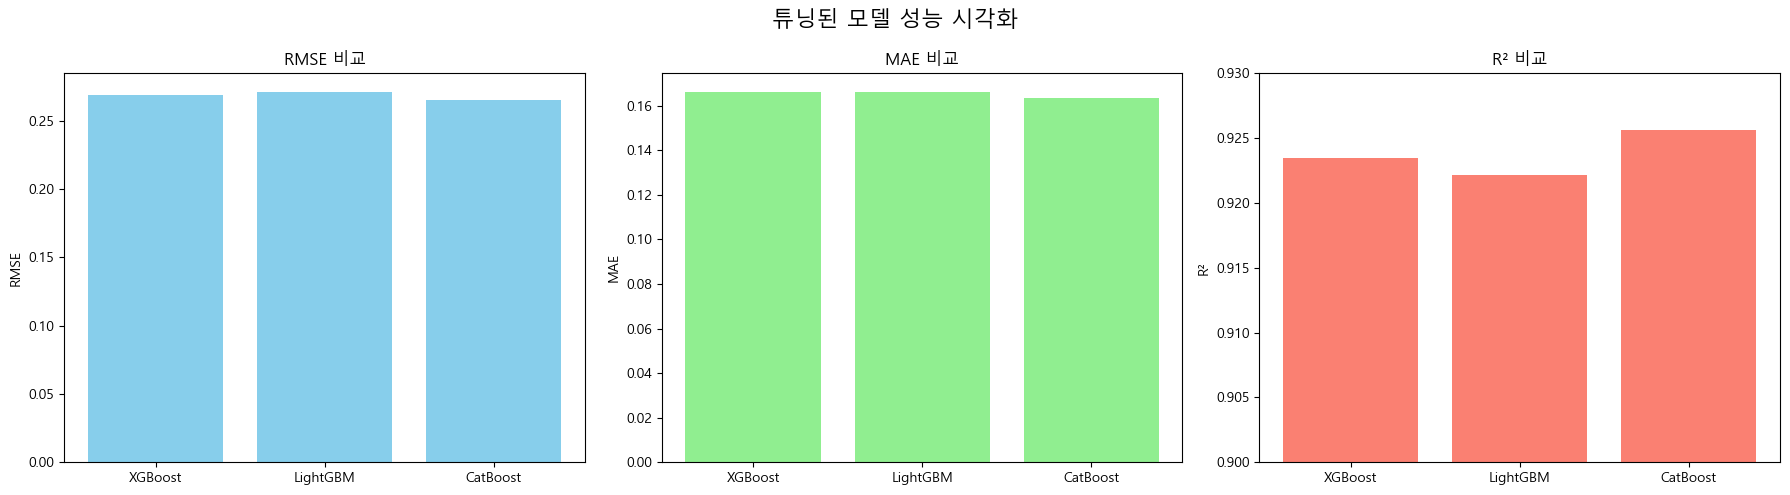

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

# 음수 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False
# 결과 테이블 다시 정의
result_df = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM', 'CatBoost'],
    'RMSE': [0.268714, 0.271022, 0.264941],
    'MAE': [0.166161, 0.165877, 0.163201],
    'R2': [0.923491, 0.922171, 0.925625]
})

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
axes[0].bar(result_df['Model'], result_df['RMSE'], color='skyblue')
axes[0].set_title('RMSE 비교')
axes[0].set_ylabel('RMSE')

# MAE
axes[1].bar(result_df['Model'], result_df['MAE'], color='lightgreen')
axes[1].set_title('MAE 비교')
axes[1].set_ylabel('MAE')

# R²
axes[2].bar(result_df['Model'], result_df['R2'], color='salmon')
axes[2].set_title('R² 비교')
axes[2].set_ylabel('R²')
axes[2].set_ylim(0.90, 0.93)

plt.suptitle('튜닝된 모델 성능 시각화', fontsize=16)
plt.tight_layout()
plt.show()


In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor

# -----------------------------
# 1. 학습 데이터 로드 및 전처리
# -----------------------------
df = pd.read_csv("C:/Users/tnfus/Desktop/프로야구타자/0123타자.csv", encoding='euc-kr')

features = ['Year', 'Team', 'Prev_Salary', 'is_rookie', 'FA',
           'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
           'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
           'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA', 'wRC+']
target = 'Salary'
categorical_cols = ['Team', 'is_rookie', 'FA', 'Position']

# 범주형 처리 + LabelEncoder 저장
label_encoders = {}
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 학습 데이터 구성
X = df[features]
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 2. CatBoost 모델 학습 (튜닝된 하이퍼파라미터)
# -----------------------------
best_params_cat = {
    'depth': 9,
    'learning_rate': 0.07204026107635567,
    'iterations': 428,
    'l2_leaf_reg': 4.10508898972346,
    'random_strength': 1.1936439660030436,
    'bagging_temperature': 0.28080845727710235,
    'verbose': 0,
    'random_state': 42
}

model_cat_best = CatBoostRegressor(**best_params_cat)
model_cat_best.fit(X_train, y_train)

# -----------------------------
# 3. 테스트 데이터 예측
# -----------------------------
df_test = pd.read_excel("C:/Users/tnfus/Desktop/프로야구타자/24타자.xlsx")

# 범주형 처리 (학습 LabelEncoder 사용)
for col in categorical_cols:
    df_test[col] = df_test[col].astype(str)
    df_test[col] = df_test[col].map(lambda x: x if x in label_encoders[col].classes_ else 'Unknown')
    if 'Unknown' not in label_encoders[col].classes_:
        label_encoders[col].classes_ = np.append(label_encoders[col].classes_, 'Unknown')
    df_test[col] = label_encoders[col].transform(df_test[col])

# 예측용 피처 구성
X_test = df_test[features]

# 예측
df_test['Predicted_Salary'] = model_cat_best.predict(X_test)

# 결과 출력
print(df_test[['Name', 'Year', 'Predicted_Salary']])

# (선택) 엑셀 저장
df_test.to_excel("C:/Users/tnfus/Desktop/프로야구타자/24타자_CatBoost_예측결과.xlsx", index=False)


    Name  Year  Predicted_Salary
0    강민성  2024       3362.683898
1    강민호  2024      75913.829910
2    강백호  2024      77693.479088
3    강성우  2024       3483.761690
4    강승구  2024       3336.801271
..   ...   ...               ...
290  홍현빈  2024       4250.568031
291  황대인  2024       5479.959400
292  황성빈  2024      16060.876681
293  황영묵  2024       8394.679682
294  황재균  2024      81658.400729

[295 rows x 3 columns]
